# 분석용 데이터 구축 문제해결 시나리오 결과물 제출 - 김정욱

In [215]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sns

## 1번. 데이터셋을 로드하고 범주형 변수에 대한 측도를 지정하라. (10점)

In [216]:
xlsx = read_excel('http://itpaper.co.kr/data/poll.xlsx', engine='openpyxl')
df = xlsx
df
#범주형 변수
    #명목형 = 성별(1,2), 결혼상태(1,2,3), 직업(1,2,..,7,8)
    #순서형 = 교육정도(1,2,3,4,5)
#양적 변수 = 나이, 월수입

,일련번호,성별,결혼상태,나이,직업,교육정도,월수입
0,1,1,1,21,1,4,60
1,2,1,1,22,5,5,100
2,3,1,1,33,1,4,200
3,4,2,2,33,7,4,120
4,5,1,2,28,1,4,70
5,6,1,1,21,5,5,80
6,7,2,2,39,7,4,190
7,8,1,1,32,1,4,100
8,9,1,2,44,3,1,120
9,10,1,2,55,4,4,110


## 2번. 연속형 변수에 대한 기술통계량을 확인하여 데이터프레임으로 구성하고 
## ‘위쪽 극단치 경계’, ‘아래쪽 극단치 경계’라는 인덱스를 추가하여 적절한 값을 구해 넣으시오.
## 또한, 1행n열의 서브플롯을 구성하여 각각의 연속형 변수들에 대한 상자그림을 그리시오. 
## 예를 들어 연속형 변수가 3개라면 1행 3열의 서브 플롯이 구성되어야 합니다. (25점)

In [217]:
set2 = df[['일련번호', '나이' ,'월수입']]
num1 = df['나이'].describe()
print(num1)
num2 = df['월수입'].describe()
print(num2)

count    40.000000
mean     34.275000
std      11.602359
min      20.000000
25%      24.750000
50%      32.000000
75%      42.500000
max      59.000000
Name: 나이, dtype: float64
count     40.00000
mean     130.22500
std       72.19258
min       50.00000
25%       77.50000
50%      105.00000
75%      175.00000
max      349.00000
Name: 월수입, dtype: float64


In [218]:
source = [
    [34.275, 130.225],
    [20, 50],
    [32, 105],
    [59, 349],
    [20, 50],
    [59, 300]
]
dff = DataFrame(source,
              index=['평균', '최소값', '중앙값', '최대값', '위쪽 극단치 경계', '아래쪽 극단치 경계'],
              columns=['나이','월수입'])
dff.T

,평균,최소값,중앙값,최대값,위쪽 극단치 경계,아래쪽 극단치 경계
나이,34.275,20.0,32.0,59.0,20.0,59.0
월수입,130.225,50.0,105.0,349.0,50.0,300.0


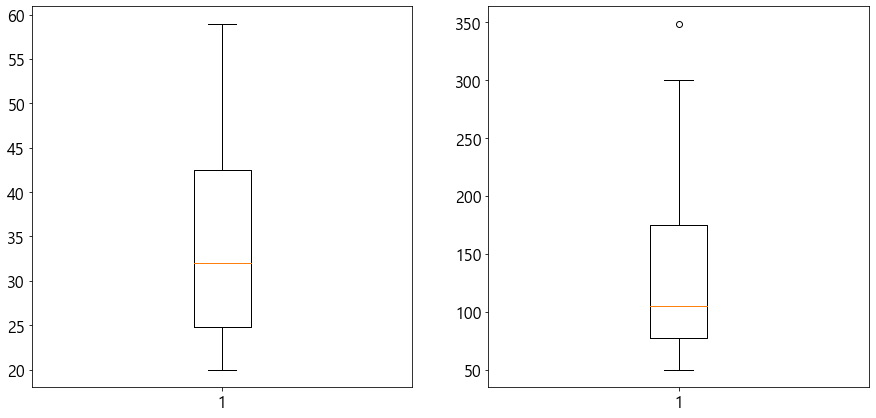

In [219]:
fig, ax = plt.subplots(1,2, figsize=(15,7))

a = list(set2['나이'])
ax[0].boxplot(a)

b = list(set2['월수입'])
ax[1].boxplot(b)

plt.show()
plt.close()

## 3번. 연속형 변수에 대해 나타난 이상치를 최빈값으로 대체하시오.

In [220]:
# 2번의 Boxplot을 근거로 '월수입' 변수의 38번, 349를 이상치로 판단
df['월수입'].mode()

0    100
dtype: int64

In [221]:
df.replace(349, 100)

,일련번호,성별,결혼상태,나이,직업,교육정도,월수입
0,1,1,1,21,1,4,60
1,2,1,1,22,5,5,100
2,3,1,1,33,1,4,200
3,4,2,2,33,7,4,120
4,5,1,2,28,1,4,70
5,6,1,1,21,5,5,80
6,7,2,2,39,7,4,190
7,8,1,1,32,1,4,100
8,9,1,2,44,3,1,120
9,10,1,2,55,4,4,110


## 4번. 성별, 결혼상태, 직업, 학력에 대한 도수분포표를 구하고 2행 2열의 서브 플롯에 각 비율을 파이 그래프로 표현하시오. (20점)

In [222]:
dfs = df.성별.value_counts()
sex = pd.DataFrame(df.성별.value_counts())
sex.index = ['남자', '여자']
sex

,성별
남자,27
여자,13


In [223]:
dfm = df.결혼상태.value_counts()
marry = pd.DataFrame(df.결혼상태.value_counts())
marry.sort_index(inplace=True)
marry.index = ['미혼', '기혼', '이혼']
marry

,결혼상태
미혼,15
기혼,23
이혼,2


In [224]:
dfj = df.직업.value_counts()
job = pd.DataFrame(df.직업.value_counts())
job.sort_index(inplace=True)
job.index = ['회사원', '공무원', '노무자', '정치가','학생', '기업가' ,'주부', '기타']
job

,직업
회사원,12
공무원,1
노무자,5
정치가,3
학생,5
기업가,7
주부,6
기타,1


In [225]:
dfe = df.교육정도.value_counts()
edu = pd.DataFrame(df.교육정도.value_counts())
edu.sort_index(inplace=True)
edu.index = ['무학', '국졸' ,'중졸', '고졸', '대졸']
edu

,교육정도
무학,1
국졸,1
중졸,3
고졸,19
대졸,16


In [226]:
sex_list = list(sex.index)
marry_list = list(marry.index)
job_list = list(job.index)
edu_list = list(edu.index)

In [227]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['axes.unicode_minus'] = False

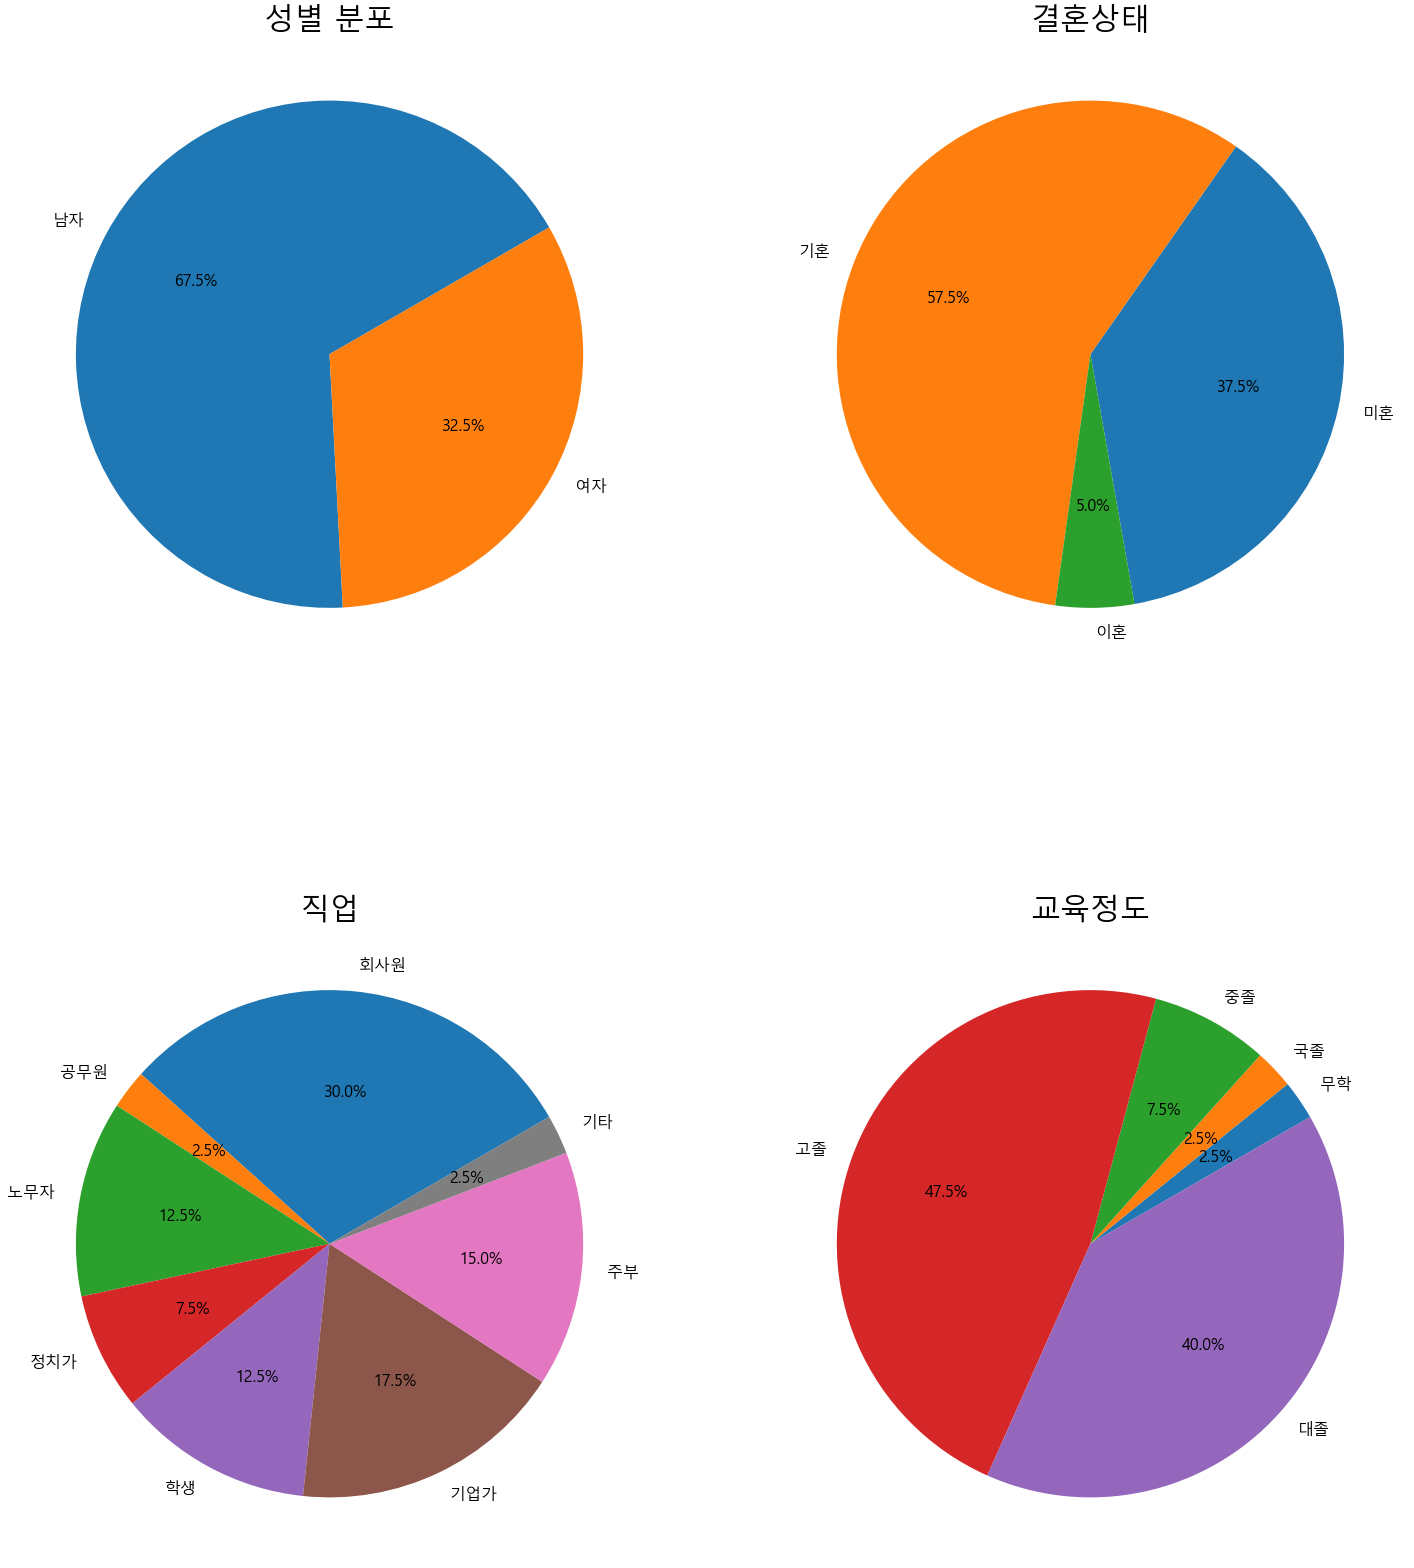

In [228]:
fig, ax = plt.subplots(2, 2, figsize = (25, 30))

sex['성별'].plot.pie(labels = sex_list,
                   autopct = '%0.1f%%',
                   startangle = 30,
                   ax=ax[0][0])

ax[0][0].set_title('성별 분포', fontsize = 30)
ax[0][0].set_ylabel(None)

marry['결혼상태'].plot.pie(labels = marry_list,
                   autopct = '%0.1f%%',
                   startangle = -80,
                   ax=ax[0][1])

ax[0][1].set_title('결혼상태', fontsize = 30)
ax[0][1].set_ylabel(None)

job['직업'].plot.pie(labels = job_list,
                   autopct = '%0.1f%%',
                   startangle = 30,
                   ax=ax[1][0])

ax[1][0].set_title('직업', fontsize = 30)
ax[1][0].set_ylabel(None)

edu['교육정도'].plot.pie(labels = edu_list,
                   autopct = '%0.1f%%',
                   startangle = 30,
                   ax=ax[1][1])

ax[1][1].set_title('교육정도', fontsize = 30)
ax[1][1].set_ylabel(None)

plt.show()
plt.close()

## 5번. 나이와 월수입에 대한 히스토그램을 
## 2행 1열의 서브플롯으로 구현하시오.
## 나이는 0~60 사이의 범위에서 6개 구간으로 나누고,
## 월수입은 0~350사이의 범위를 7개 구간으로 나누어 표현하시오. (30점)

In [229]:
list_age = list(df['나이'])
age0_10 = []
age10_20 = []
age20_30 = []
age30_40 = []
age40_50 = []
age50_60 = []
for i in list_age:
    if i > 0 and i <= 10 :
        age0_10.append(i)
    elif i > 10 and i <= 20:
        age10_20.append(i)
    elif i > 20 and i <= 30:
        age20_30.append(i)
    elif i > 30 and i <= 40:
        age30_40.append(i)
    elif i > 40 and i <= 50:
        age40_50.append(i)
    else:
        age50_60.append(i)

ag = {
    '0~10': len(age0_10),
    '10~20': len(age10_20),
    '20~30': len(age20_30),
    '30~40': len(age30_40),
    '40~50': len(age40_50),
    '50~60': [len(age50_60)]
}

ages = DataFrame(ag).T
ages

,0
0~10,0
10~20,1
20~30,16
30~40,10
40~50,8
50~60,5


In [230]:
list_pay = list(df['월수입'])
pay0_50 = []
pay50_100 = []
pay100_150 = []
pay150_200 = []
pay200_250 = []
pay250_300 = []
pay300_350 = []
for i in list_pay:
    if i > 0 and i <= 50 :
        pay0_50.append(i)
    elif i > 50 and i <= 100:
        pay50_100.append(i)
    elif i > 100 and i <= 150:
        pay100_150.append(i)
    elif i > 150 and i <= 200:
        pay150_200.append(i)
    elif i > 200 and i <= 250:
        pay200_250.append(i)
    elif i > 250 and i <= 300:
        pay250_300.append(i)
    else:
        pay300_350.append(i)

py = {
    '0~50': len(pay0_50),
    '50~100': len(pay50_100),
    '100~150': len(pay100_150),
    '150~200': len(pay150_200),
    '200~250': len(pay200_250),
    '250~300': [len(pay250_300)],
    '300~350': [len(pay300_350)]
}

pays = DataFrame(py).T
pays

,0
0~50,3
50~100,17
100~150,9
150~200,5
200~250,4
250~300,1
300~350,1


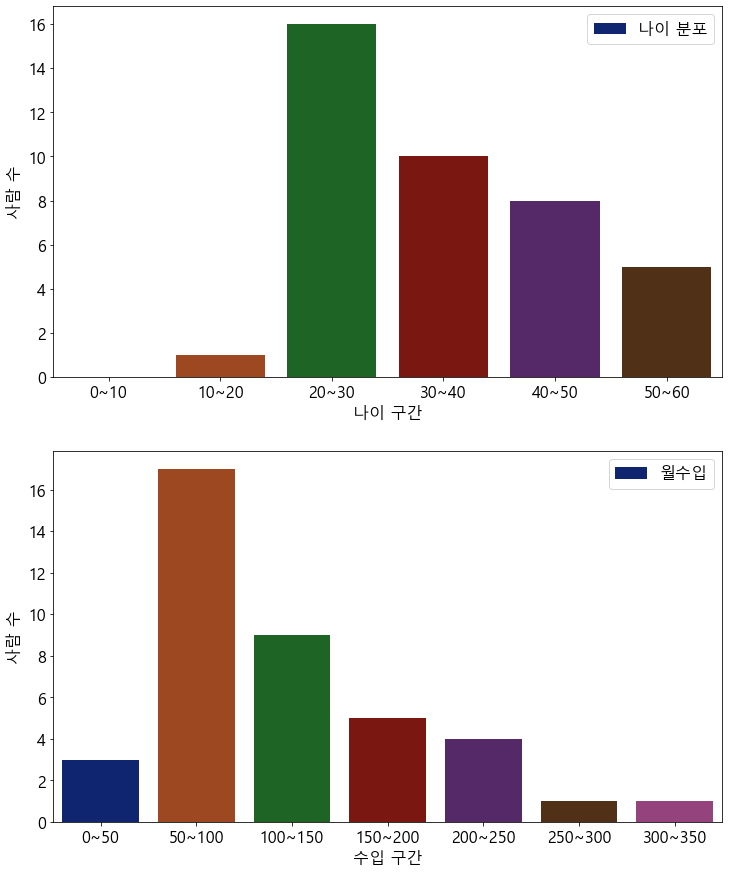

In [233]:
fig, ax = plt.subplots(2, 1, figsize = (12, 15))

sns.barplot(data = ages, x = ages.index, label = '나이 분포', palette = 'dark', y = ages[0], ax = ax[0])
ax[0].legend()
ax[0].set_xlabel('나이 구간')
ax[0].set_ylabel('사람 수')

sns.barplot(data = pays, x = pays.index, label = '월수입', palette = 'dark', y = pays[0], ax = ax[1])
ax[1].legend()
ax[1].set_xlabel('수입 구간')
ax[1].set_ylabel('사람 수')

plt.show()
plt.close()